# Importing the necessary libraries

In [ ]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Loading the Dataset

In [ ]:
data = pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Analyzing the Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Assuming 'data' is your DataFrame loaded from "car data.csv"
unique_brands = data['Car_Name'].nunique()
print(f"There are {unique_brands} unique car brands in the data.")

There are 98 unique car brands in the data.


In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Exploratory Data Analysis (EDA)

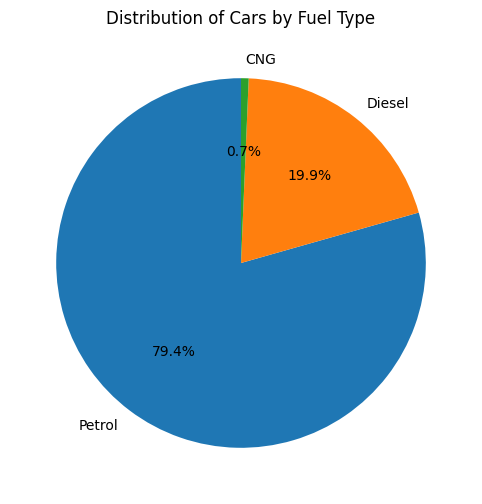

In [ ]:
# Pie chart for the number of cars by fuel type
fuel_type_counts = data['Fuel_Type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cars by Fuel Type')
plt.show()

<ipython-input-10-fabd14923dea>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Transmission', data=data, palette='viridis')


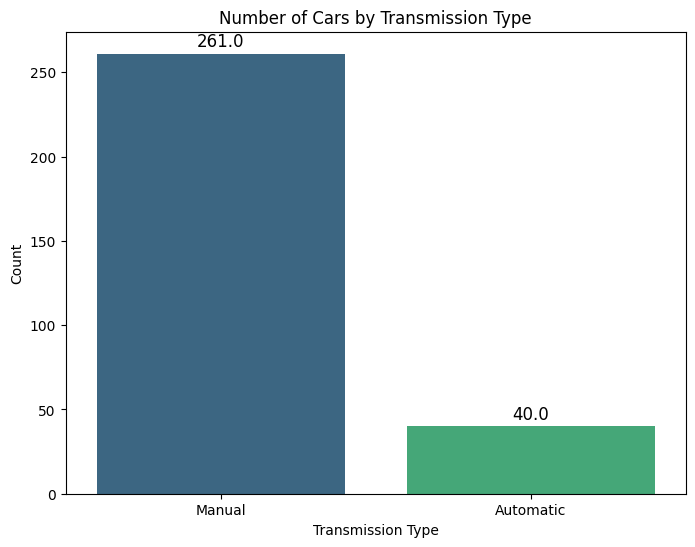

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Transmission', data=data, palette='viridis')

# Add the counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add labels and title
plt.title('Number of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')

# Show the plot
plt.show()


<ipython-input-11-127cf6289a14>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Seller_Type', data=data, palette='viridis')


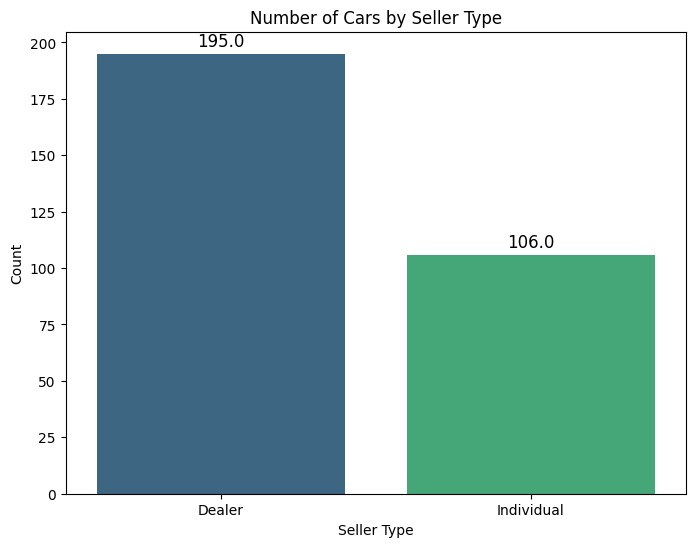

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Seller_Type', data=data, palette='viridis')

# Add the counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add labels and title
plt.title('Number of Cars by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Count')

# Show the plot
plt.show()


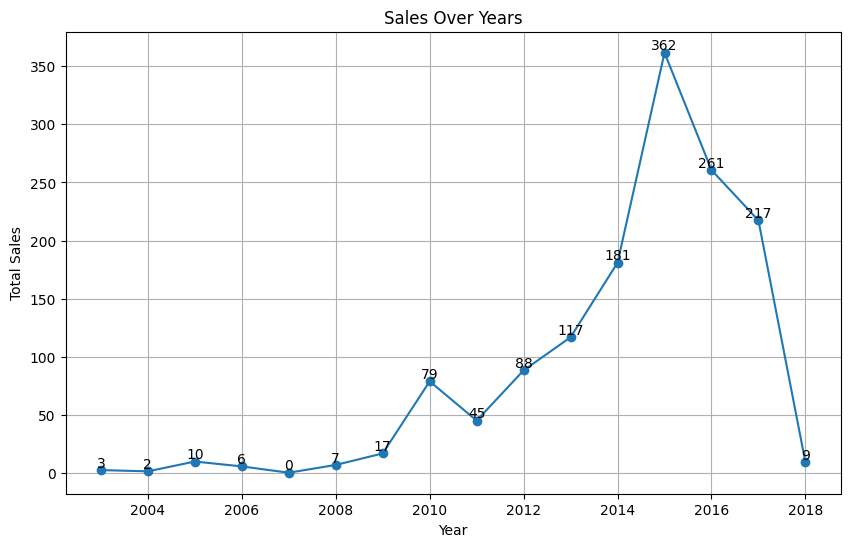

In [ ]:
import matplotlib.pyplot as plt

# Group the data by year and sum the sales for each year
sales_by_year = data.groupby('Year')['Selling_Price'].sum()

# Create a line plot of sales over years
plt.figure(figsize=(10, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o')  # Added marker to highlight data points

# Add the sales values on the line plot
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Group the data by year and sum the sales for each year
sales_by_year = data.groupby('Year')['Selling_Price'].sum()

# Sort the sales by year in descending order
top_5_years = sales_by_year.sort_values(ascending=False).head(5)

print("Top 5 Years with Highest Sales:")
print(top_5_years)

Top 5 Years with Highest Sales:
Year
2015    361.55
2016    260.66
2017    217.32
2014    180.96
2013    116.85
Name: Selling_Price, dtype: float64


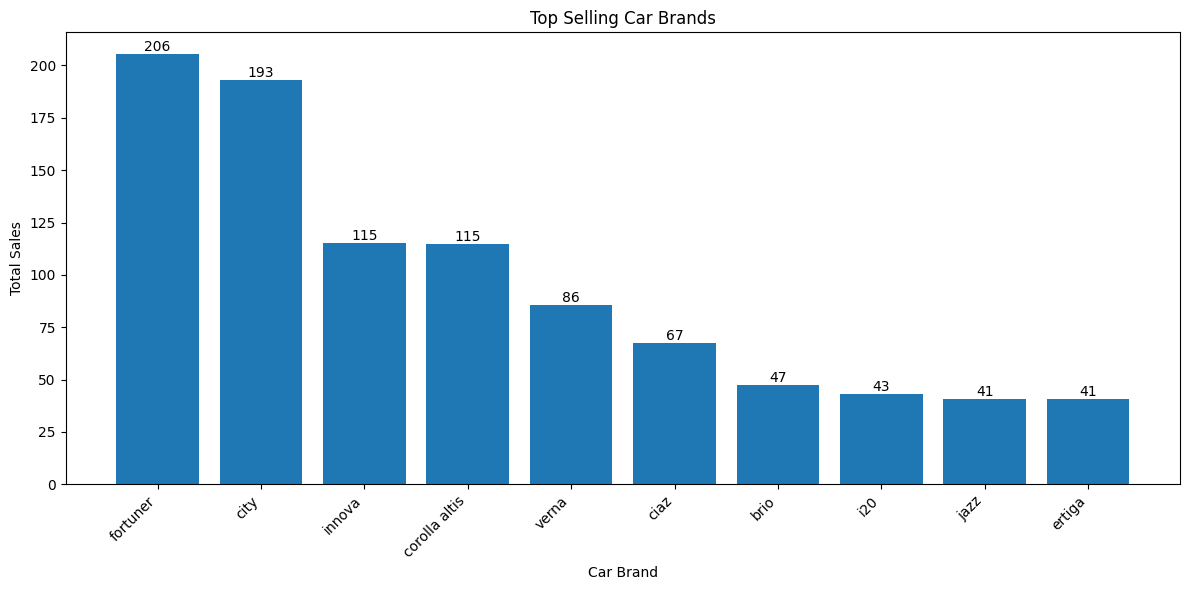

In [ ]:
import matplotlib.pyplot as plt

# Group the data by brand and sum the selling price for each brand
brand_sales = data.groupby('Car_Name')['Selling_Price'].sum()

# Sort the sales by brand in descending order
top_selling_brands = brand_sales.sort_values(ascending=False).head(10)

# Create a bar chart of top-selling brands
plt.figure(figsize=(12, 6))
bars = plt.bar(top_selling_brands.index, top_selling_brands.values)

# Add sales values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.0f}',
             ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Top Selling Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Show the plot
plt.show()


In [ ]:
# Assuming 'data' is your DataFrame and it has a column named 'Kms_Driven'
top_10_kms = data.sort_values('Kms_Driven', ascending=False).head(10)

print("Top 10 Cars with Highest Kms Driven:")
print(top_10_kms[['Car_Name', 'Kms_Driven']])

Top 10 Cars with Highest Kms Driven:
             Car_Name  Kms_Driven
196         Activa 3g      500000
179     Honda Karizma      213000
84             innova      197176
85              camry      142000
77            corolla      135154
53           fortuner      135000
37                800      127000
50           fortuner      104707
200  Bajaj Pulsar 150       92233
54             innova       90000


    Car_Name  Selling_Price  Present_Price  Profit_Loss
0       ritz           3.35           5.59        -2.24
1        sx4           4.75           9.54        -4.79
2       ciaz           7.25           9.85        -2.60
3    wagon r           2.85           4.15        -1.30
4      swift           4.60           6.87        -2.27
..       ...            ...            ...          ...
296     city           9.50          11.60        -2.10
297     brio           4.00           5.90        -1.90
298     city           3.35          11.00        -7.65
299     city          11.50          12.50        -1.00
300     brio           5.30           5.90        -0.60

[301 rows x 4 columns]


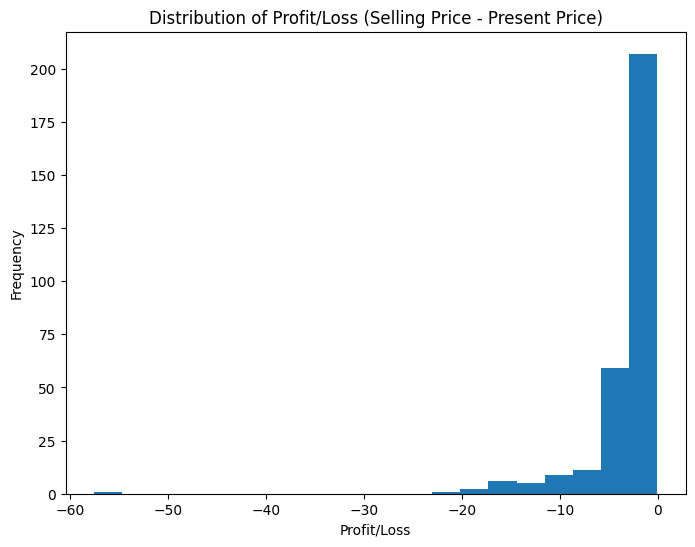

Total Profit/Loss: -893.1199999999999
Number of Cars with Profit: 0
Number of Cars with Loss: 301
Car_Name
800                  -1.93
Activa 3g            -0.44
Activa 4g            -0.11
Bajaj  ct 100        -0.14
Bajaj Avenger 150    -0.05
                     ...  
sx4                 -29.45
verna               -46.09
vitara brezza        -0.58
wagon r              -7.75
xcent                -6.49
Name: Profit_Loss, Length: 98, dtype: float64


In [ ]:
# Assuming 'data' is your DataFrame and it has columns 'Selling_Price' and 'Present_Price'
data['Profit_Loss'] = data['Selling_Price'] - data['Present_Price']

# Display the DataFrame with the new column
print(data[['Car_Name', 'Selling_Price', 'Present_Price', 'Profit_Loss']])

# You can also analyze the profit/loss further, e.g., by plotting a histogram
plt.figure(figsize=(8, 6))
plt.hist(data['Profit_Loss'], bins=20)
plt.title('Distribution of Profit/Loss (Selling Price - Present Price)')
plt.xlabel('Profit/Loss')
plt.ylabel('Frequency')
plt.show()

# To find the total profit or loss:
total_profit_loss = data['Profit_Loss'].sum()
print(f"Total Profit/Loss: {total_profit_loss}")

# To find the number of cars with profit and loss:
num_profit = (data['Profit_Loss'] > 0).sum()
num_loss = (data['Profit_Loss'] < 0).sum()
print(f"Number of Cars with Profit: {num_profit}")
print(f"Number of Cars with Loss: {num_loss}")

# You can also analyze the profit/loss by different categories like car brand, year, etc.
# For example, to find the profit/loss by car brand:
profit_loss_by_brand = data.groupby('Car_Name')['Profit_Loss'].sum()
print(profit_loss_by_brand)

# You can further analyze the data and create visualizations to understand the profit/loss trend.

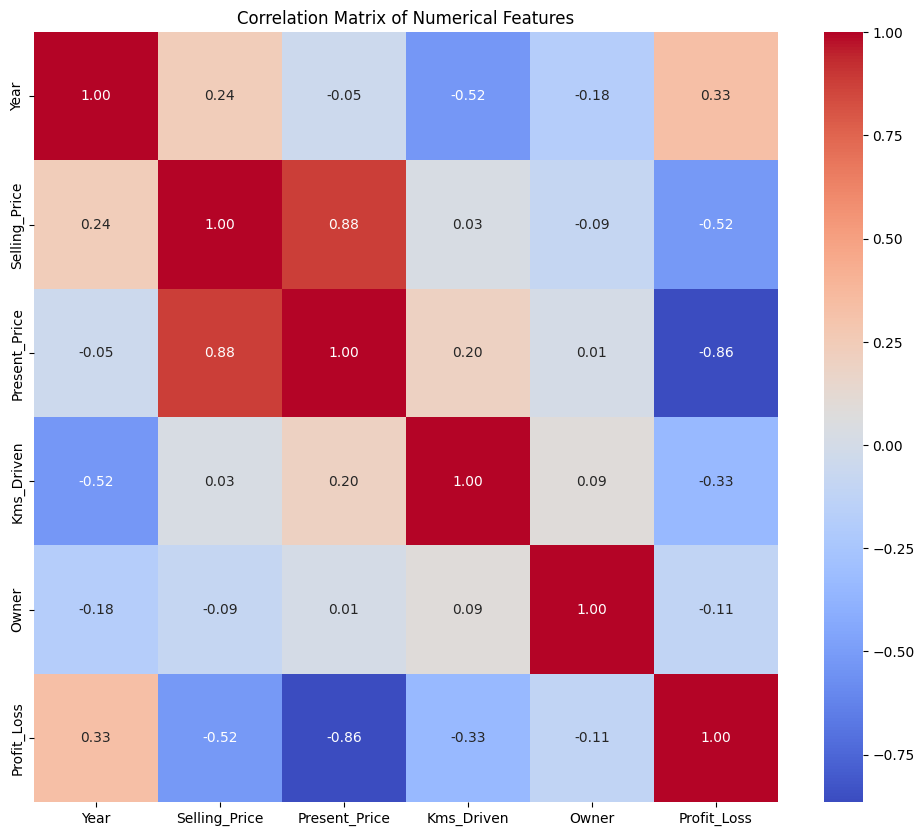

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and you want to create a heatmap
# of the correlation between numerical features

# Select only numerical features for correlation calculation
numerical_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features only
correlation_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

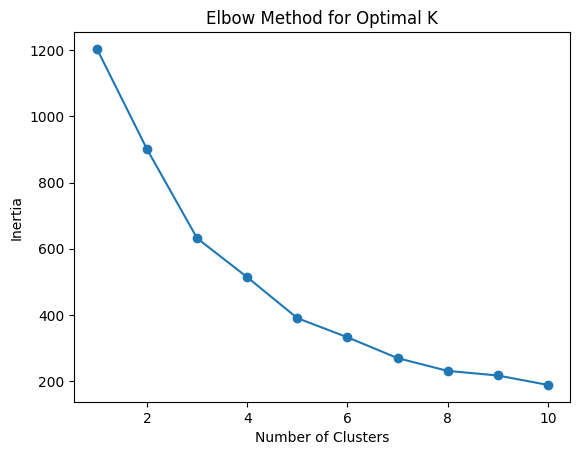

Cluster 0:
              Year  Selling_Price  Present_Price    Kms_Driven       Owner  \
count   228.000000     228.000000     228.000000    228.000000  228.000000   
mean   2014.692982       4.001842       5.773053  27204.605263    0.026316   
std       1.612873       3.161460       4.472565  17689.837477    0.160425   
min    2011.000000       0.180000       0.320000    500.000000    0.000000   
25%    2014.000000       0.875000       1.192500  13525.000000    0.000000   
50%    2015.000000       3.925000       5.755000  24900.000000    0.000000   
75%    2016.000000       6.000000       8.922500  40006.500000    0.000000   
max    2018.000000      12.900000      18.610000  83000.000000    1.000000   

       Profit_Loss  Cluster  
count   228.000000    228.0  
mean     -1.771211      0.0  
std       1.918885      0.0  
min     -11.660000      0.0  
25%      -2.625000      0.0  
50%      -1.290000      0.0  
75%      -0.336500      0.0  
max      -0.030000      0.0  
Cluster 1:
     

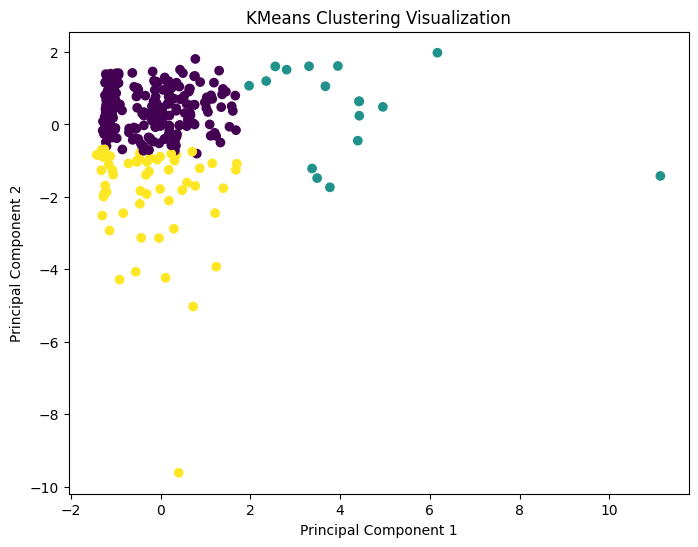

In [ ]:
# Select the features you want to use for clustering
X = data[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Year']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, choose the optimal number of clusters (e.g., 3)
n_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_

# Analyze the clusters
for i in range(n_clusters):
  print(f"Cluster {i}:")
  print(data[data['Cluster'] == i].describe())

# Visualize the clusters (you can use PCA to reduce dimensionality for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('KMeans Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

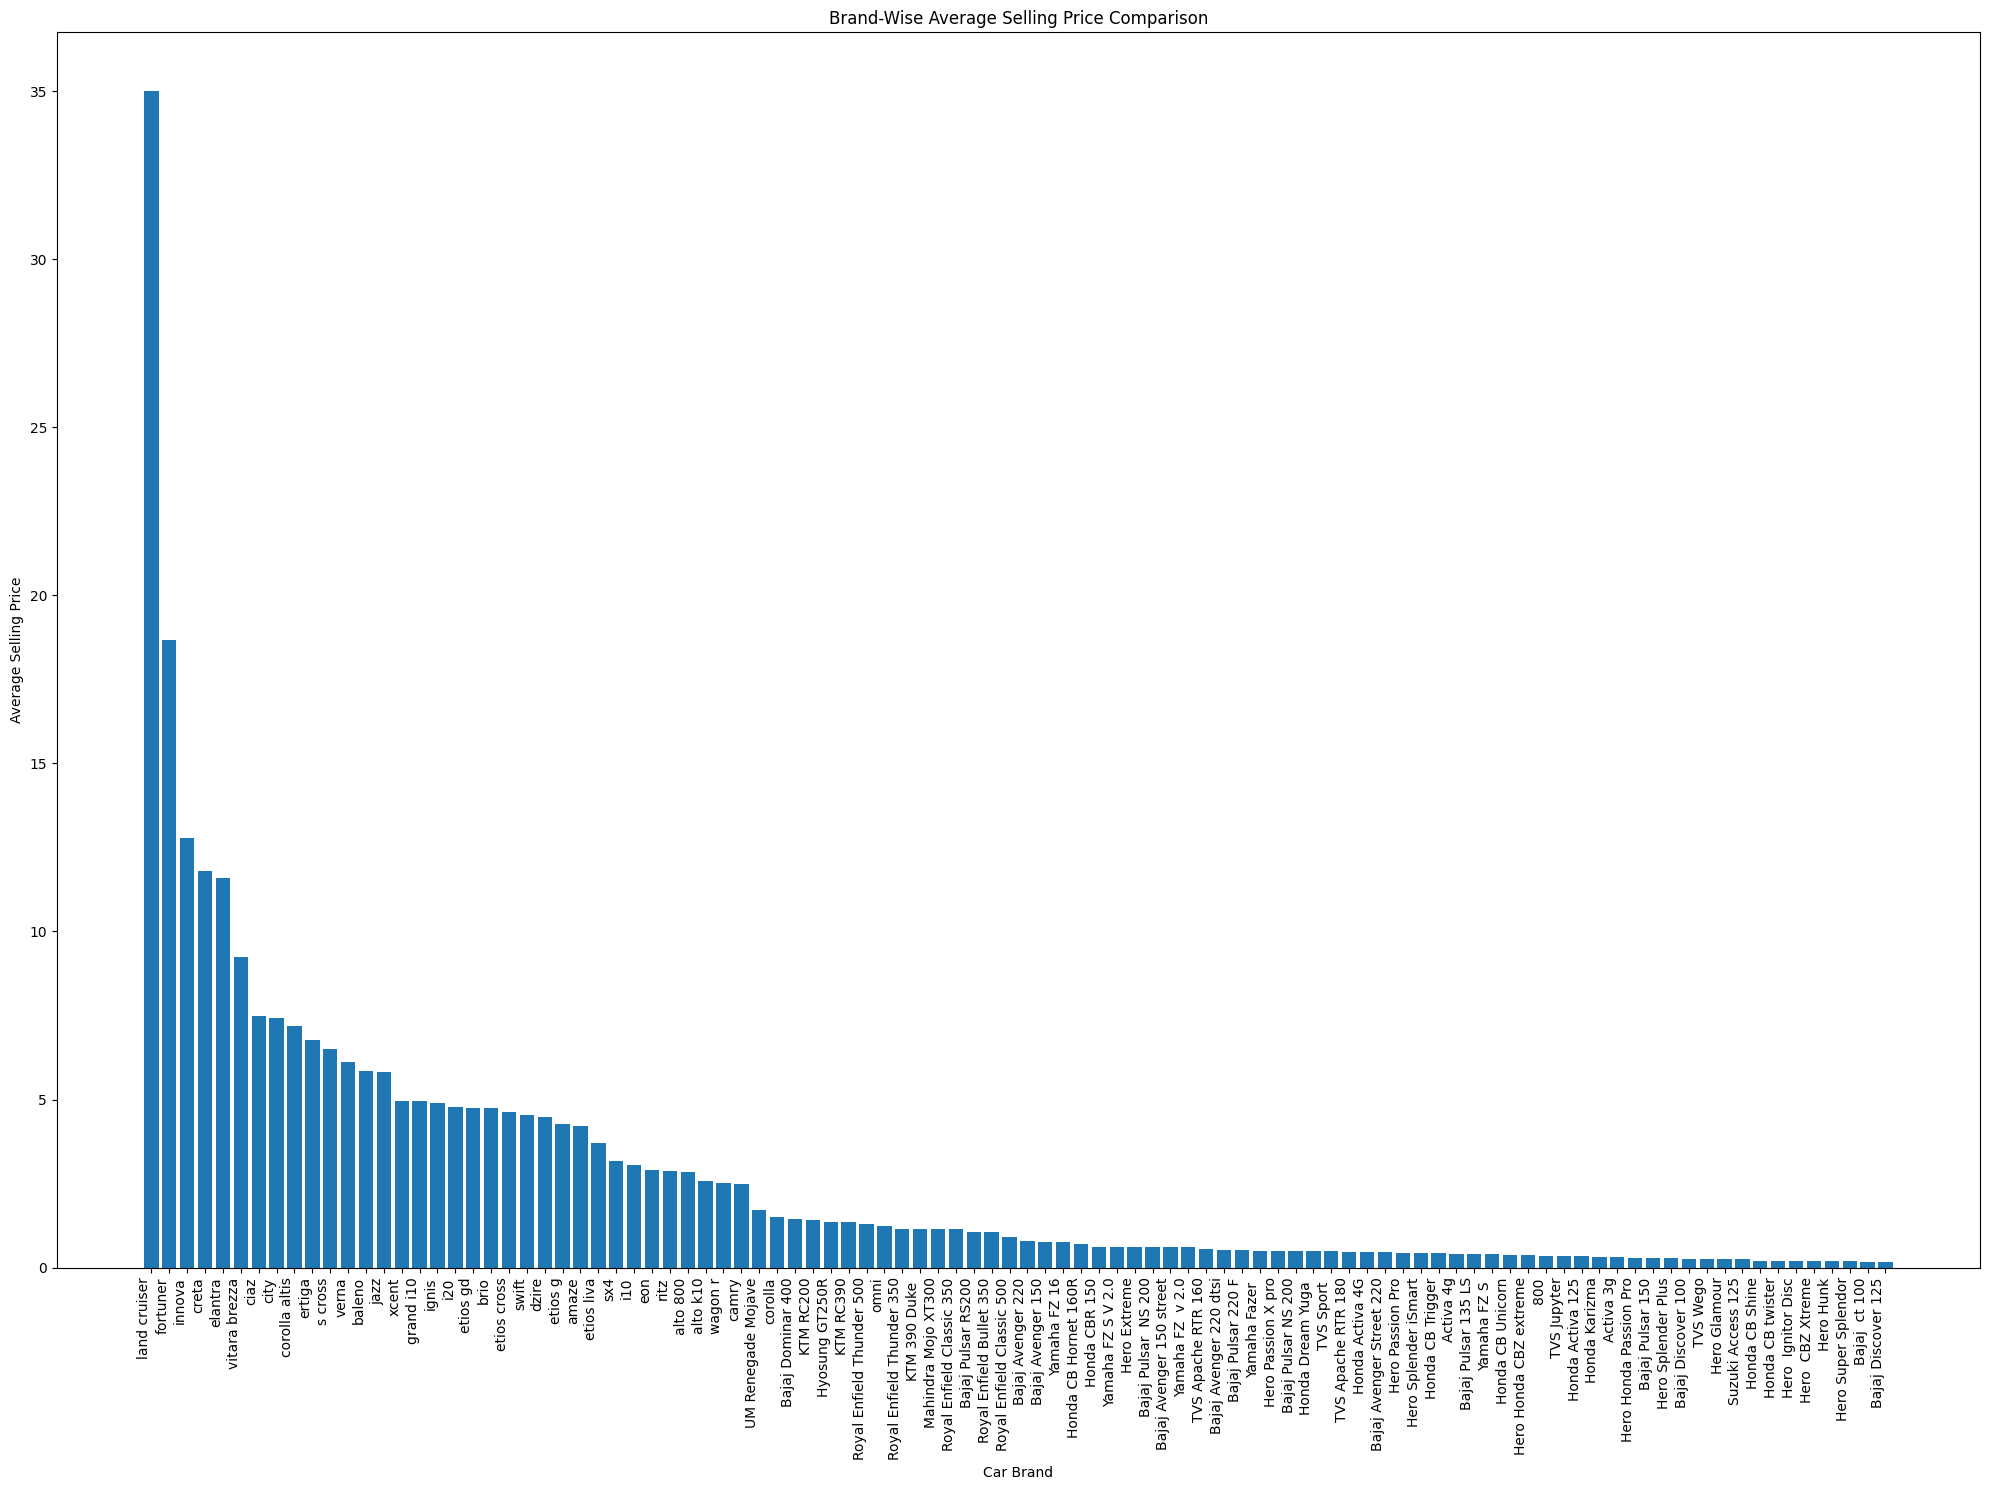

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("car data.csv")

# Group the data by brand and calculate the average selling price for each brand
brand_speed_comparison = data.groupby('Car_Name')['Selling_Price'].mean()

# Sort the brands by average selling price in descending order
brand_speed_comparison = brand_speed_comparison.sort_values(ascending=False)

# Create a bar chart of brand-wise average selling price
plt.figure(figsize=(20, 15))
plt.bar(brand_speed_comparison.index, brand_speed_comparison.values)
plt.title('Brand-Wise Average Selling Price Comparison')
plt.xlabel('Car Brand')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

There are 98 unique car brands in the data.
Linear Regression - Mean Squared Error: 4.010554030275675
Linear Regression - R-squared: 0.825897448934144
Random Forest - Mean Squared Error: 0.8306581611475403
Random Forest - R-squared: 0.9639402177784602
Decision Tree - Mean Squared Error: 1.3329196721311478
Decision Tree - R-squared: 0.9421364944763141


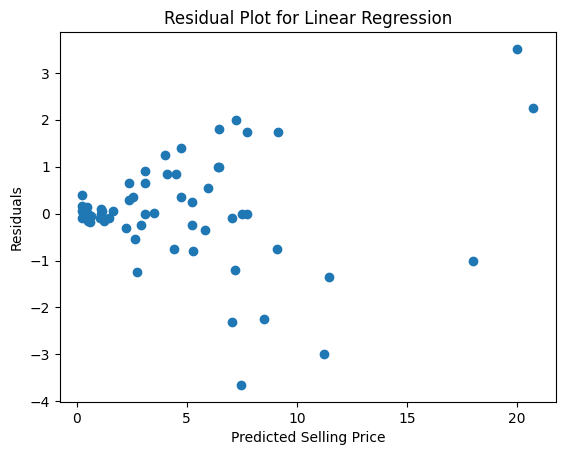

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Load the data
data = pd.read_csv("car data.csv")

# Assuming 'data' is your DataFrame loaded from "car data.csv"
unique_brands = data['Car_Name'].nunique()
print(f"There are {unique_brands} unique car brands in the data.")
data.describe()

# ... (Your existing EDA code)


# Load the data
data = pd.read_csv("car data.csv")

# Select features and target variable
X = data[['Present_Price', 'Kms_Driven', 'Year']]
y = data['Selling_Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Squared Error: {mse}")
print(f"Linear Regression - R-squared: {r2}")


# Load the data
data = pd.read_csv("car data.csv")

# Select features and target variable
X = data[['Present_Price', 'Kms_Driven', 'Year', 'Fuel_Type', 'Seller_Type', 'Transmission']]
y = data['Selling_Price']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest - Mean Squared Error: {mse}")
print(f"Random Forest - R-squared: {r2}")


# Load the data
data = pd.read_csv("car data.csv")

# Select features and target variable
X = data[['Present_Price', 'Kms_Driven', 'Year', 'Fuel_Type', 'Seller_Type', 'Transmission']]
y = data['Selling_Price']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Decision Tree - Mean Squared Error: {mse}")
print(f"Decision Tree - R-squared: {r2}")

# Error Analysis (Example: Residual Plot for Linear Regression)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Selling Price")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regression")
plt.show()

# You can further analyze the residuals to understand the patterns of errors.
# You can also analyze feature importance for Random Forest and Decision Tree.


# Hence, it is clear that "Random Forest Regression" gives the maximum acuuracy, which means that this algorithm is the best fit for this data as the accuracy(0.963) is closer to 1.